In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [85]:
#Question
#In this assignment, you will predict the life expectancy of a newborn based on several attributes (features) related to the region which he/she was born in.

In [86]:
#Set up
life_expectancy_train_dataset = "s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv"
life_expectancy_test_dataset = "s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv"

In [87]:
#Set Dataframes
le_train_DF = pd.read_csv(life_expectancy_train_dataset) #Training Set Dataframe
le_test_DF = pd.read_csv(life_expectancy_test_dataset) #Test Set Dataframe


ID                                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
TARGET_LifeExpectancy           AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Country                         AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Year                            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Status                          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
AdultMortality                  AxesSubplot(0.789286,0.772143;0.110714x0.107857)
AdultMortality-Male                AxesSubplot(0.125,0.642714;0.110714x0.107857)
AdultMortality-Female           AxesSubplot(0.257857,0.642714;0.110714x0.107857)
InfantDeaths                    AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Alcohol                         AxesSubplot(0.523571,0.642714;0.110714x0.107857)
PercentageExpenditure           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Measles                         AxesSubplot(0.789286,0.642714;0.110714x0.107857)
BMI                         

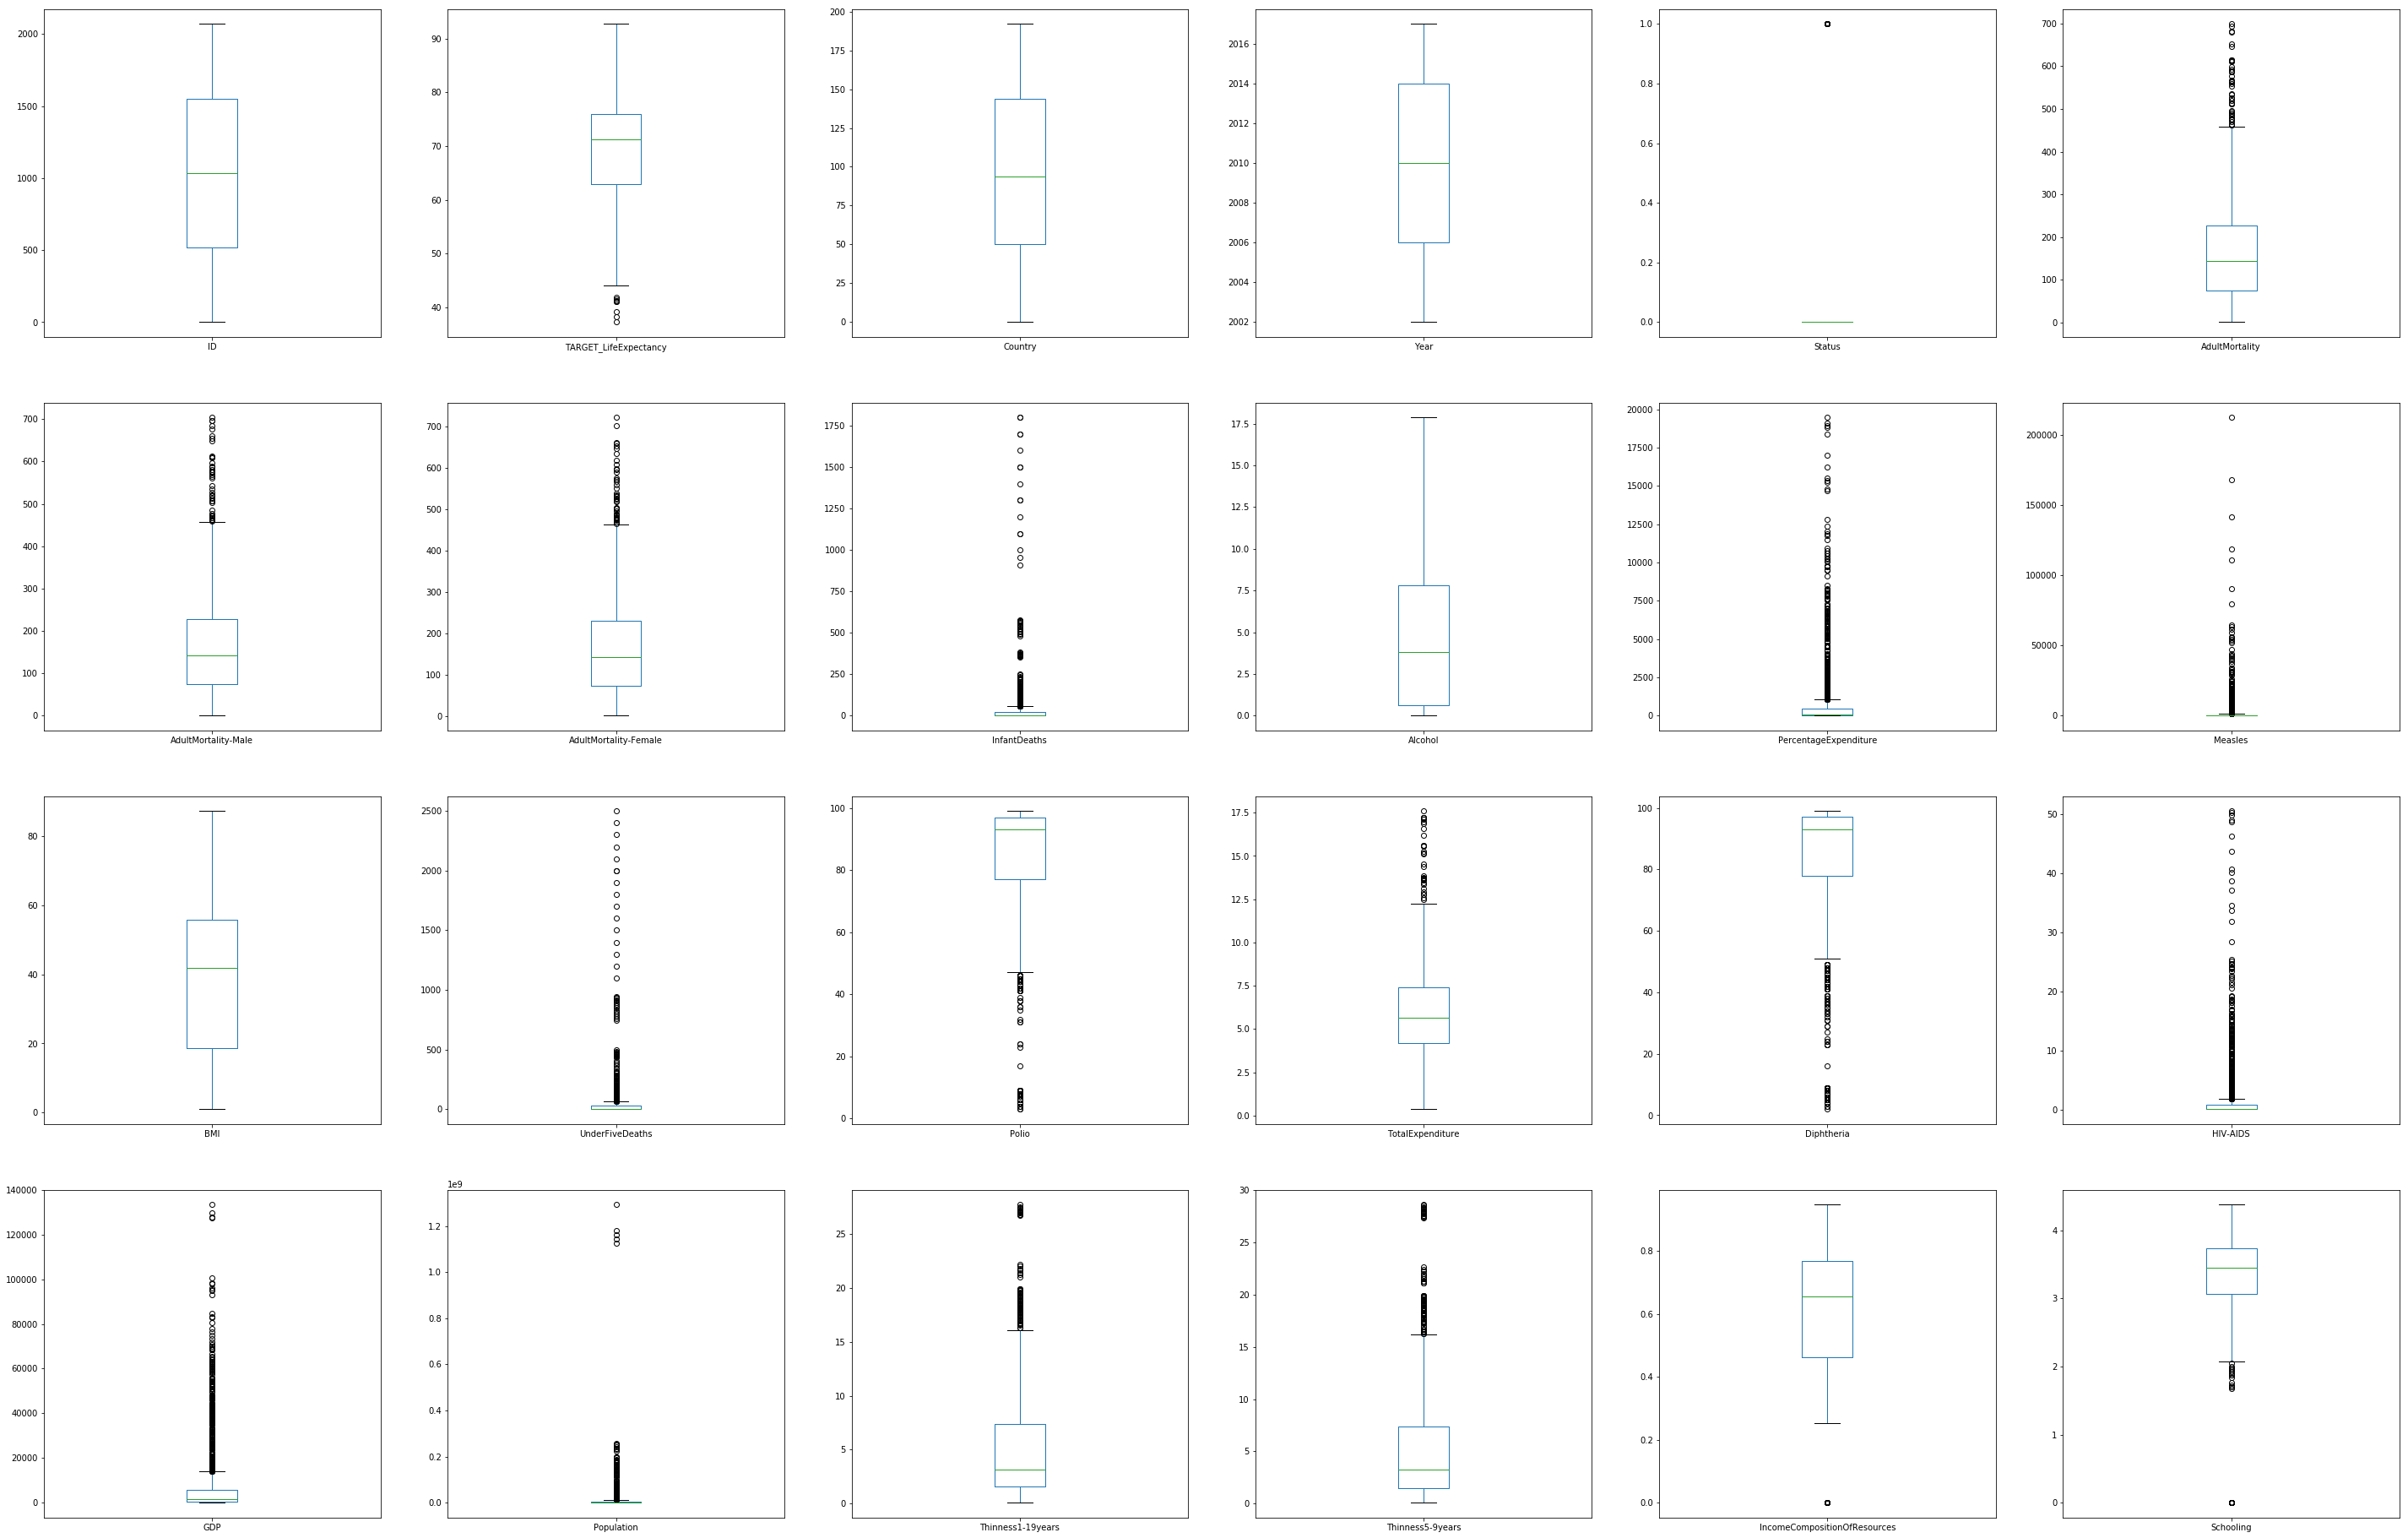

In [88]:
#Analysis of Data

#Box Plot to find the outliers within the dataset
le_train_DF.plot(kind="box", subplots=True, layout=(6,6),
                sharex=False, sharey=False, figsize=(50,50))


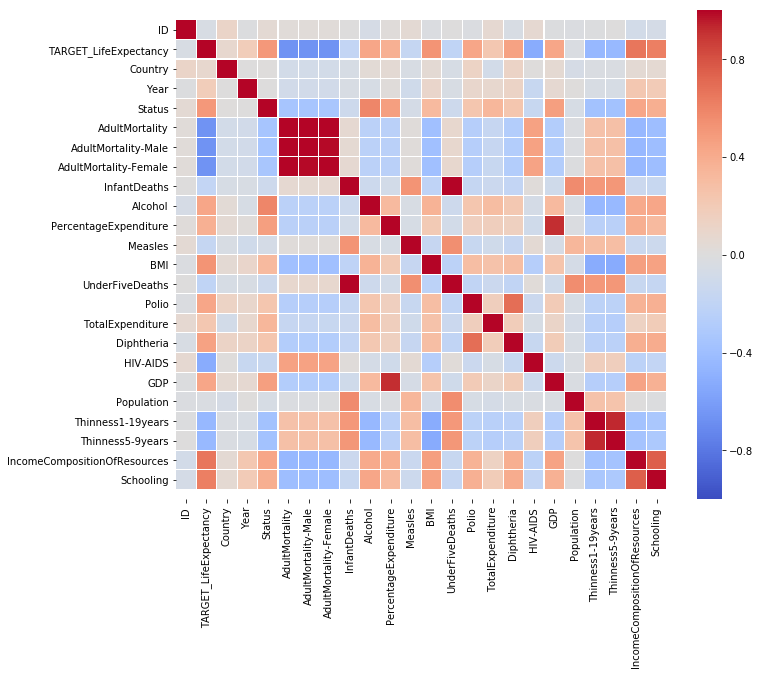

In [89]:
#Analysis- Correlation Heat Map
import seaborn as sns

correlations = le_train_DF.corr()

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(round(correlations,2), ax=ax, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f', linewidths=.05)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
#Normalise the data, using the min-max feature scaling x'= (x - min(x)) / (max(x) - min(x))
independent_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
target_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataframe_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#Set X as all independent variables (minus TARGET_LifeExpectancy)
X_DF = le_train_DF.iloc[:, 2:]
# #Set Y as dependent variable 'TARGET_LifeExpectancy'
Y_DF = le_train_DF['TARGET_LifeExpectancy']

#Convert into Array to manipulate
X_values = X_DF.values
Y_values = Y_DF.values

X_values_scaled = independent_scaler.fit_transform(X_values.reshape(-1, 1))
Y_values_scaled = target_scaler.fit_transform(Y_values.reshape(-1, 1))

X = pd.DataFrame(X_values_scaled)
Y = pd.DataFrame(Y_values_scaled)

print(X_values_scaled.shape)
print(Y_values_scaled.shape)

n_le_DF = dataframe_scaler.fit_transform(le_train_DF.values)

In [ ]:

# #Evaluation
# from sklearn.metrics import mean_squared_error
# print('Mean Squared Error', mean_squared_error(testY,predYRm_unscaled))

In [ ]:
#Splitting Training, and Validation set, via KFold Method
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
number_splits = 10
kFold = model_selection.KFold(n_splits = number_splits, shuffle=True)

lRegPara = np.linspace(0.001, .5, num=20)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
linReg = linear_model.LinearRegression()
polyFeat = PolynomialFeatures(degree=4, include_bias=True)

lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0

for trainIndex, validIndex in kFold.split(X):
    
    # Get the training and validaton data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)
    
    for j, regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)
    
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold'+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")


# from sklearn.decomposition import PCA

# #Make an instance of the Model
# pca = PCA(.95)

# pca.fit(n_le_DF)


In [ ]:
#Histograms
X.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=True)
plt.show()

In [ ]:
#Validation and Evaluation Set


In [418]:
#Training model